# Exploratory Data Analysis

### Roles to Explore

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import adjustText
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

In [3]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


## Filtering for India Data Engineer Roles

In [4]:
df_india = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Engineer')]
df_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"[powershell, python, sql, mysql, sql server, d...","{'cloud': ['databricks', 'azure'], 'databases'..."
80,Data Engineer,Director - Enterprise Architecture and Data En...,"Chennai, Tamil Nadu, India",via Indeed,Full-time,False,India,2023-05-11 13:20:16,False,False,India,None,NaN,NaN,Ford Motor Company,"[gcp, graphql, kubernetes]","{'cloud': ['gcp'], 'libraries': ['graphql'], '..."
95,Data Engineer,Data Engineer,"Mumbai, Maharashtra, India",via Crimsoniteam.freshteam.com,Full-time,False,India,2023-07-31 13:35:48,False,False,India,None,NaN,NaN,Crimson Interactive Inc,"[nosql, mongodb, mongodb, elasticsearch, mysql...","{'analyst_tools': ['tableau'], 'databases': ['..."
149,Data Engineer,Data Engineering Lead,"New Delhi, Delhi, India",via LinkedIn,Full-time,False,India,2023-04-11 13:55:10,True,False,India,None,NaN,NaN,Axtria - Ingenious Insights,"[python, sql, aws, azure, gcp, spark, tableau,...","{'analyst_tools': ['tableau', 'microstrategy',..."
210,Data Engineer,Azure Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-03-06 14:00:44,True,False,India,None,NaN,NaN,Mississippi Consultants LLP,"[sql, python, databricks, azure, pyspark, pand...","{'analyst_tools': ['power bi'], 'cloud': ['dat..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785584,Data Engineer,Data Engineer,"Bengaluru, Karnataka, India",via BeBee India,Full-time,False,India,2023-01-01 06:29:29,False,False,India,None,NaN,NaN,Alcon,"[python, scala, java, sql, aws, redshift, spri...","{'async': ['jira', 'confluence'], 'cloud': ['a..."
785636,Data Engineer,Data Engineer,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-03 06:25:53,False,False,India,None,NaN,NaN,TMRW House of Brands,"[mongodb, mongodb, python, postgresql, spark, ...","{'databases': ['mongodb', 'postgresql'], 'libr..."
785684,Data Engineer,Data Engineer,"Noida, Uttar Pradesh, India",via LinkedIn,Full-time,False,India,2023-01-11 06:28:41,False,False,India,None,NaN,NaN,Deuglo Infosystem Private Limited,"[sql, shell, python, aws]","{'cloud': ['aws'], 'programming': ['sql', 'she..."
785695,Data Engineer,AWS Data Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-05 06:35:07,False,False,India,None,NaN,NaN,LatentView Analytics,"[python, sql, scala, aws, snowflake, databrick...","{'cloud': ['aws', 'snowflake', 'databricks'], ..."


In [25]:
df_plot = df_india['job_location'].value_counts().to_frame().head(10)
df_plot

,count
job_location,
"Bengaluru, Karnataka, India",5036
"Hyderabad, Telangana, India",2269
Anywhere,1881
India,1855
"Pune, Maharashtra, India",1628
"Chennai, Tamil Nadu, India",1390
"Mumbai, Maharashtra, India",928
"Gurugram, Haryana, India",920
"New Delhi, Delhi, India",461


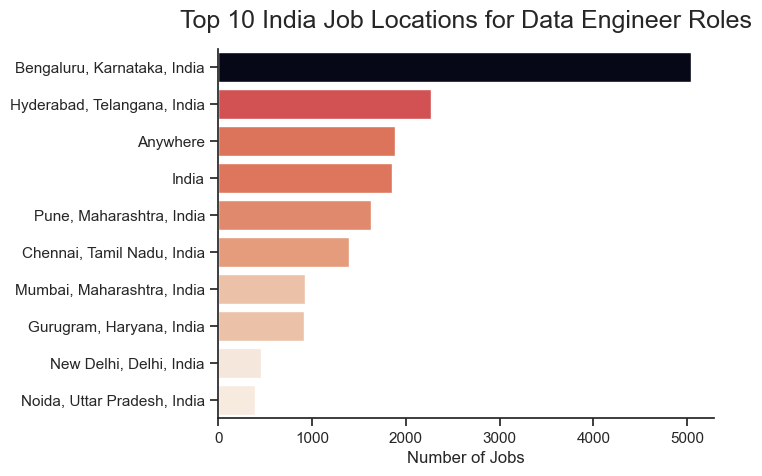

In [26]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', legend=False, palette='rocket_r')
sns.despine()
plt.title('Top 10 India Job Locations for Data Engineer Roles', fontsize=18, pad=15)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


### Job Opportunities

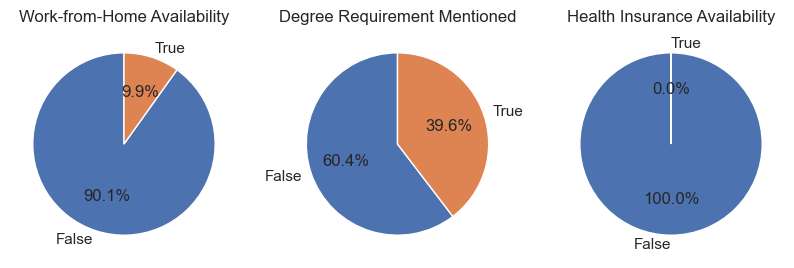

In [29]:
dict_column = {
    'job_work_from_home': 'Work-from-Home Availability',
    'job_no_degree_mention': 'Degree Requirement Mentioned',
    'job_health_insurance': 'Health Insurance Availability'
}

fig, ax = plt.subplots(1,3, figsize=(10,5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_india[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

## Which companies hire the most data jobs in India?

In [58]:
# filtering the data for India
DF_India = df[df['job_country'] == 'India']

top_companies = DF_India['company_name'].value_counts().head(10).to_frame()
top_companies

,count
company_name,
Tata Consultancy Services,432
Confidential,410
IBM,358
Visa,300
PepsiCo,262
Virtusa,256
LTIMindtree,256
Wells Fargo,252
S&P Global,241


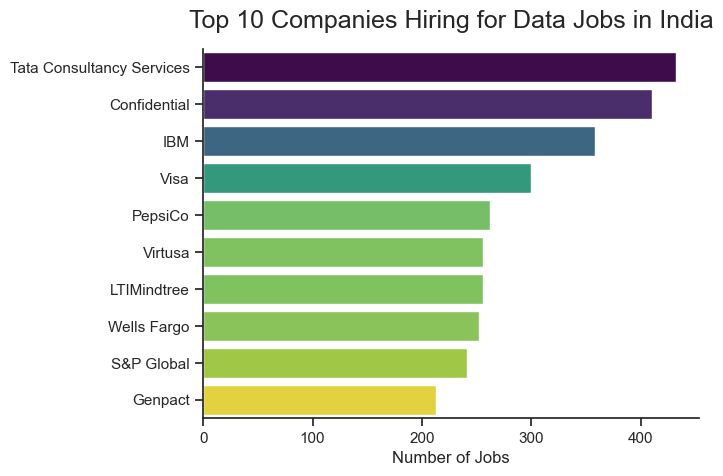

In [59]:
sns.set_theme(style='ticks')
sns.barplot(data =top_companies ,x='count', y='company_name', palette='viridis_r', hue='count', legend=False)
sns.despine()
plt.title('Top 10 Companies Hiring for Data Jobs in India', fontsize=18, pad=15)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()